<시작하세요! 텐서플로 2.0 프로그래밍> 예제코드입니다.

- 예제 코드를 실행하기 위해서는 [파일] > [드라이브에 사본 저장]으로 본인의 계정에 사본을 만든 다음 실행하면 됩니다.
- 예제 코드는 [깃허브 저장소](https://github.com/wikibook/tf2)에서도 동일하게 제공됩니다. 예제에 대한 질문이나 책에 대한 질문은 깃허브 저장소의 [Issues](https://github.com/wikibook/tf2/issues)에 올려주세요.
- 각 장의 예제 파일은 처음부터 끝까지 실행하는 상황을 가정하고 작성되었습니다. 혹시 세션이 다운되는 등의 이유로 실행이 되지 않는 경우가 있다면, 필요한 라이브러리를 import 하신 후에 실행하시면 됩니다. (tensorflow, numpy, pandas 등)

# 5.1 이항 분류

In [1]:
# 텐서플로 2 버전 선택
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

import tensorflow as tf

In [31]:
# 5.1 와인 데이터셋 불러오기
import pandas as pd
red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')


In [29]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [30]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


In [32]:
# 5.2 와인 데이터셋 합치기
red['type'] = 0
white['type'] = 1

In [33]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [34]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


In [35]:
wine = pd.concat([red, white])

In [37]:
wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


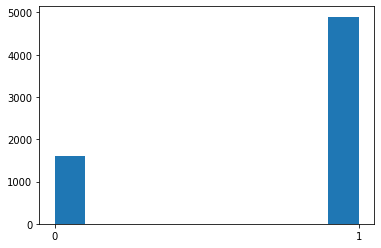

In [38]:
# 5.3 레드 와인과 화이트 와인 type 히스토그램
import matplotlib.pyplot as plt
plt.hist(wine['type'])
plt.xticks([0, 1])
plt.show()


In [39]:
print(wine['type'].value_counts())

1    4898
0    1599
Name: type, dtype: int64


In [5]:
# 5.4 데이터 요약 정보 확인
print(wine.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB
None


In [40]:
# 5.5 데이터 정규화
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())


In [41]:
wine_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.333333,0.0
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870,0.333333,0.0
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870,0.333333,0.0
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870,0.500000,0.0
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.333333,0.0


In [42]:
wine_norm.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,0.282257,0.107143,0.0,0.214876,0.264463,0.322314,1.0
volatile acidity,6497.0,0.173111,0.109758,0.0,0.100000,0.140000,0.213333,1.0
citric acid,6497.0,0.191948,0.087541,0.0,0.150602,0.186747,0.234940,1.0
residual sugar,6497.0,0.074283,0.072972,0.0,0.018405,0.036810,0.115031,1.0
chlorides,6497.0,0.078129,0.058195,0.0,0.048173,0.063123,0.093023,1.0
free sulfur dioxide,6497.0,0.102518,0.061630,0.0,0.055556,0.097222,0.138889,1.0
total sulfur dioxide,6497.0,0.252868,0.130235,0.0,0.163594,0.258065,0.345622,1.0
density,6497.0,0.146262,0.057811,0.0,0.100829,0.149990,0.190476,1.0
pH,6497.0,0.386435,0.124641,0.0,0.302326,0.379845,0.465116,1.0
sulphates,6497.0,0.174870,0.083599,0.0,0.117978,0.162921,0.213483,1.0


In [43]:
# 5.6 데이터 섞은 후 numpy array로 변환
import numpy as np
wine_shuffle = wine_norm.sample(frac=1)
print(wine_shuffle.head())

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
2607       0.421488          0.120000     0.198795        0.115031   0.024917   
391        0.818182          0.223333     0.409639        0.035276   0.126246   
2194       0.214876          0.066667     0.192771        0.138037   0.071429   
1997       0.380165          0.080000     0.228916        0.171779   0.076412   
3412       0.247934          0.106667     0.174699        0.136503   0.054817   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
2607             0.159722              0.451613  0.163293  0.317829   
391              0.055556              0.085253  0.275496  0.263566   
2194             0.079861              0.193548  0.177174  0.488372   
1997             0.173611              0.377880  0.256217  0.480620   
3412             0.190972              0.347926  0.168691  0.302326   

      sulphates   alcohol  quality  type  
2607   0.134831  0.405797      0.5   1.0  


In [44]:
wine_np = wine_shuffle.to_numpy()

In [45]:
print(wine_np[:5])

[[0.4214876  0.12       0.19879518 0.11503067 0.02491694 0.15972222
  0.4516129  0.16329285 0.31782946 0.13483146 0.4057971  0.5
  1.        ]
 [0.81818182 0.22333333 0.40963855 0.03527607 0.12624585 0.05555556
  0.08525346 0.27549643 0.26356589 0.3258427  0.28985507 0.5
  0.        ]
 [0.21487603 0.06666667 0.19277108 0.13803681 0.07142857 0.07986111
  0.19354839 0.1771737  0.48837209 0.15168539 0.20289855 0.5
  1.        ]
 [0.38016529 0.08       0.22891566 0.17177914 0.07641196 0.17361111
  0.37788018 0.25621747 0.48062016 0.33707865 0.13043478 0.5
  1.        ]
 [0.24793388 0.10666667 0.1746988  0.13650307 0.05481728 0.19097222
  0.34792627 0.16869096 0.30232558 0.16292135 0.30434783 0.5
  1.        ]]


In [46]:
# 5.7 train 데이터와 test 데이터로 분리
import tensorflow as tf
train_idx = int(len(wine_np) * 0.8)
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]
print(train_X[0])
print(train_Y[0])
print(test_X[0])
print(test_Y[0])


[0.4214876  0.12       0.19879518 0.11503067 0.02491694 0.15972222
 0.4516129  0.16329285 0.31782946 0.13483146 0.4057971  0.5       ]
1.0
[0.19834711 0.15333333 0.13855422 0.04141104 0.07142857 0.11458333
 0.24654378 0.13842298 0.34108527 0.14606742 0.05797101 0.33333333]
1.0


In [47]:
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=2)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=2)
print(train_Y[0])
print(test_Y[0])

[0. 1.]
[0. 1.]


In [9]:
# 5.8 와인 데이터셋 분류 모델 생성
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=48, activation='relu', input_shape=(12,)),
    tf.keras.layers.Dense(units=24, activation='relu'),
    tf.keras.layers.Dense(units=12, activation='relu'),
    tf.keras.layers.Dense(units=2, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 48)                624       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                1176      
_________________________________________________________________
dense_2 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 26        
Total params: 2,126
Trainable params: 2,126
Non-trainable params: 0
_________________________________________________________________


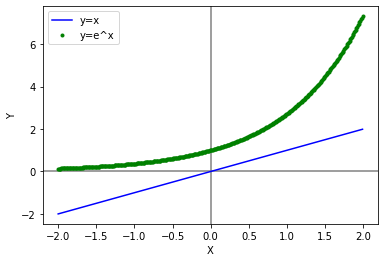

In [10]:
# 그림 5.5 출력 코드
import matplotlib.pyplot as plt
import math
import numpy as np
x = np.arange(-2, 2, 0.01)
e_x = math.e ** x

plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.plot(x, x, 'b-', label='y=x')
plt.plot(x, e_x, 'g.', label='y=e^x')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [11]:
# 5.9 와인 데이터셋 분류 모델 학습
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

Epoch 1/25
122/122 [==============================] - 0s 3ms/step - loss: 0.0976 - accuracy: 0.9638 - val_loss: 0.0458 - val_accuracy: 0.9877
Epoch 2/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0484 - accuracy: 0.9892 - val_loss: 0.0449 - val_accuracy: 0.9877
Epoch 3/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0880 - accuracy: 0.9743 - val_loss: 0.0566 - val_accuracy: 0.9869
Epoch 4/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0442 - accuracy: 0.9885 - val_loss: 0.0716 - val_accuracy: 0.9800
Epoch 5/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0394 - accuracy: 0.9908 - val_loss: 0.0613 - val_accuracy: 0.9854
Epoch 6/25
122/122 [==============================] - 0s 3ms/step - loss: 0.0364 - accuracy: 0.9918 - val_loss: 0.0481 - val_accuracy: 0.9877
Epoch 7/25
122/122 [==============================] - 0s 3ms/step - loss: 0.0407 - accuracy: 0.9900 - val_loss: 0.0414 - val_accuracy: 0.9877
Epoch 

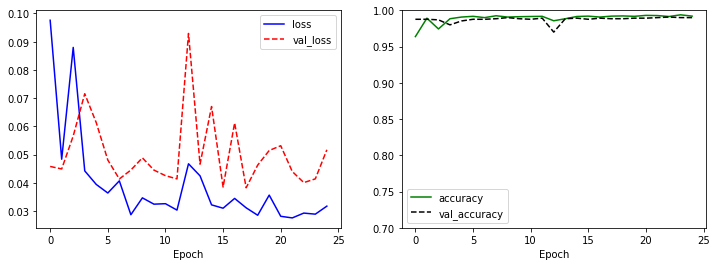

In [12]:
# 5.10 분류 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [13]:
# 5.11 분류 모델 평가
model.evaluate(test_X, test_Y)

41/41 [==============================] - 0s 880us/step - loss: 0.0645 - accuracy: 0.9869


[0.06445686519145966, 0.986923098564148]

#5.2 다항 분류

In [14]:
# 5.12 품질 데이터 확인
print(wine['quality'].describe())
print(wine['quality'].value_counts())

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


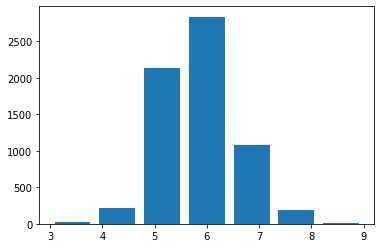

In [15]:
# 5.13 품질 히스토그램 시각화
import matplotlib.pyplot as plt
plt.hist(wine['quality'], bins=7, rwidth=0.8)
plt.show()

In [16]:
# 5.14 품질을 3개의 범주(좋음, 보통, 나쁨)로 재분류
wine.loc[wine['quality'] <= 5, 'new_quality'] = 0
wine.loc[wine['quality'] == 6, 'new_quality'] = 1
wine.loc[wine['quality'] >= 7, 'new_quality'] = 2

print(wine['new_quality'].describe())
print(wine['new_quality'].value_counts())

count    6497.000000
mean        0.829614
std         0.731124
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: new_quality, dtype: float64
1.0    2836
0.0    2384
2.0    1277
Name: new_quality, dtype: int64


In [17]:
# 5.15 데이터 정규화 및 train, test 데이터 분리
del wine['quality']
wine_backup = wine.copy()
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
wine_norm['new_quality'] = wine_backup['new_quality']
wine_shuffle = wine_norm.sample(frac=1)
wine_np = wine_shuffle.to_numpy()

train_idx = int(len(wine_np) * 0.8)
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=3)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=3)

In [18]:
# 5.16 와인 데이터셋 다항 분류 모델 생성 및 학습
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=48, activation='relu', input_shape=(12,)),
    tf.keras.layers.Dense(units=24, activation='relu'),
    tf.keras.layers.Dense(units=12, activation='relu'),
    tf.keras.layers.Dense(units=3, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.003), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

Epoch 1/25
122/122 [==============================] - 0s 4ms/step - loss: 0.9685 - accuracy: 0.5004 - val_loss: 0.8938 - val_accuracy: 0.5446
Epoch 2/25
122/122 [==============================] - 0s 1ms/step - loss: 0.8801 - accuracy: 0.5589 - val_loss: 0.8644 - val_accuracy: 0.5585
Epoch 3/25
122/122 [==============================] - 0s 1ms/step - loss: 0.8690 - accuracy: 0.5679 - val_loss: 0.8603 - val_accuracy: 0.5646
Epoch 4/25
122/122 [==============================] - 0s 1ms/step - loss: 0.8649 - accuracy: 0.5697 - val_loss: 0.8589 - val_accuracy: 0.5831
Epoch 5/25
122/122 [==============================] - 0s 1ms/step - loss: 0.8585 - accuracy: 0.5756 - val_loss: 0.8850 - val_accuracy: 0.5354
Epoch 6/25
122/122 [==============================] - 0s 1ms/step - loss: 0.8573 - accuracy: 0.5717 - val_loss: 0.8518 - val_accuracy: 0.5677
Epoch 7/25
122/122 [==============================] - 0s 1ms/step - loss: 0.8449 - accuracy: 0.5858 - val_loss: 0.8725 - val_accuracy: 0.5508
Epoch 

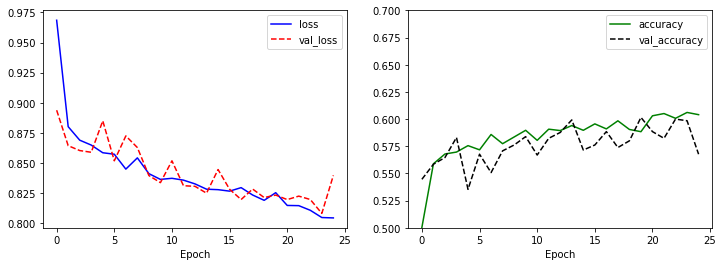

In [19]:
# 5.17 다항 분류 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.5, 0.7)
plt.legend()

plt.show()

In [20]:
# 5.18 다항 분류 모델 평가
model.evaluate(test_X, test_Y)

41/41 [==============================] - 0s 727us/step - loss: 0.8506 - accuracy: 0.5738


[0.8506327271461487, 0.573846161365509]

#5.3 Fashion MNIST

In [21]:
# 5.19 Fashion MNIST 데이터셋 불러오기
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

print(len(train_X), len(test_X))

60000 10000


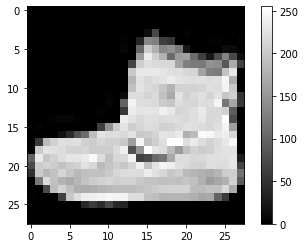

9


In [22]:
# 5.20 데이터 확인
import matplotlib.pyplot as plt
plt.imshow(train_X[0], cmap='gray')
plt.colorbar()
plt.show()

print(train_Y[0])

In [23]:
# 5.21 데이터 정규화
train_X = train_X / 255.0
test_X = test_X / 255.0

print(train_X[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [24]:
# 5.22 Fashion MNIST 분류 모델
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [25]:
# 5.23 Fashion MNIST 분류 모델 학습
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

Epoch 1/25
1407/1407 [==============================] - 3s 2ms/step - loss: 0.5233 - accuracy: 0.8173 - val_loss: 0.4303 - val_accuracy: 0.8471
Epoch 2/25
1407/1407 [==============================] - 2s 1ms/step - loss: 0.3927 - accuracy: 0.8591 - val_loss: 0.3918 - val_accuracy: 0.8611
Epoch 3/25
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3498 - accuracy: 0.8731 - val_loss: 0.3692 - val_accuracy: 0.8675
Epoch 4/25
1407/1407 [==============================] - 2s 2ms/step - loss: 0.3252 - accuracy: 0.8804 - val_loss: 0.3568 - val_accuracy: 0.8737
Epoch 5/25
1407/1407 [==============================] - 2s 1ms/step - loss: 0.3038 - accuracy: 0.8874 - val_loss: 0.3396 - val_accuracy: 0.8789
Epoch 6/25
1407/1407 [==============================] - 2s 1ms/step - loss: 0.2862 - accuracy: 0.8952 - val_loss: 0.3298 - val_accuracy: 0.8823
Epoch 7/25
1407/1407 [==============================] - 3s 2ms/step - loss: 0.2742 - accuracy: 0.8989 - val_loss: 0.3271 - val_accuracy:

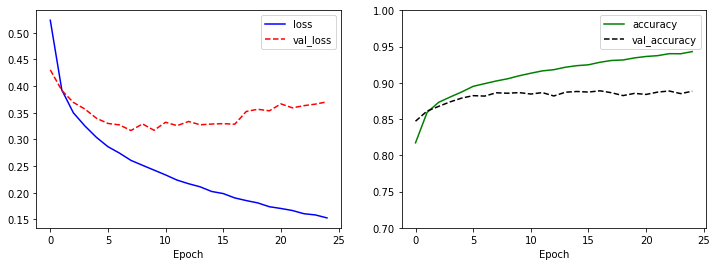

In [26]:
# 5.24 Fashion MNIST 분류 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [27]:
# 5.25 Fashion MNIST 분류 모델 평가
model.evaluate(test_X, test_Y)

313/313 [==============================] - 1s 2ms/step - loss: 0.4026 - accuracy: 0.8809


[0.4025525152683258, 0.8809000253677368]